#  **Classification Model for Stroke Prediction** 🧠🩺

##  **Objective**
This notebook demonstrates the process of training, evaluating, and visualizing a classification model to predict the occurrence of stroke based on various health and demographic factors.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Data

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Preprocessing

## Drop unnecessary columns 

In [5]:
df.drop('id',axis =1 , inplace =True)

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

## Missing values check

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- As we can see there is missing value in column `bmi` with 201 null value

## Handling Missing values 

In [8]:
from sklearn.impute import SimpleImputer

# Impute missing data using SimpleImputer (median imputation)
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])


# Another Way
# df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [9]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- **No** missing values as shown

In [10]:
# fix data tpye of age from float to int 
df['age'] = df['age'].astype(int)


---

## Outliers Check

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


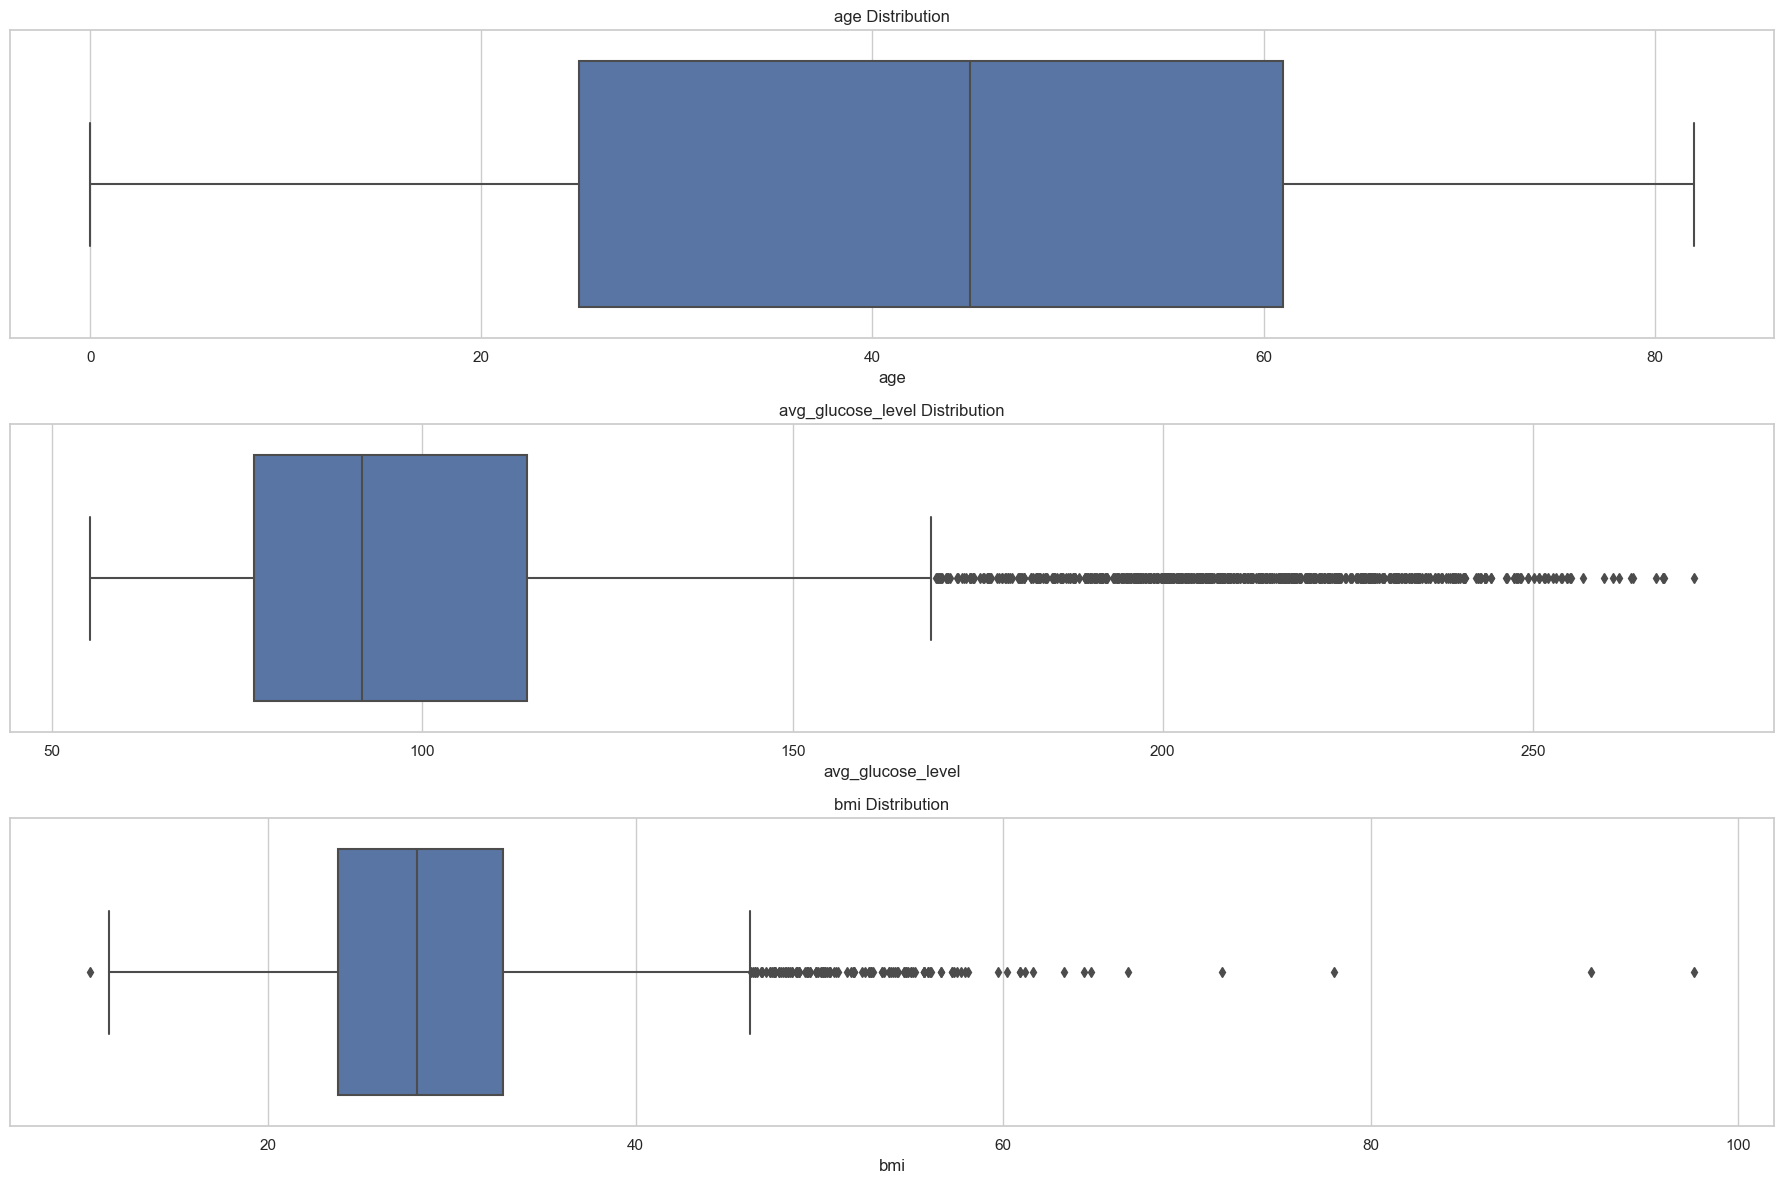

In [12]:
sns.set(style="whitegrid")

# List of columns to see Outliers
columns = ['age', 'avg_glucose_level', 'bmi']

fig, axes = plt.subplots(3, 1, figsize=(18, 12))

# Plot each column in the corresponding subplot
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])  
    axes[i].set_title(f'{col} Distribution')

# Adjust layout 
plt.subplots_adjust(hspace=0.6)
plt.tight_layout()
plt.show()

> We can see here that the `age` is normaly distributed than `avg_glucose_level` and `bmi` that have outliers especially **`bmi`**

In [13]:
df_copy = df.copy()

### Let's delete the data above normal to not include this outliers in `bmi`

In [14]:
len(df_copy[df_copy['bmi']> 56])

24

In [15]:
df_copy = df_copy[(df_copy['bmi']<= 56)]

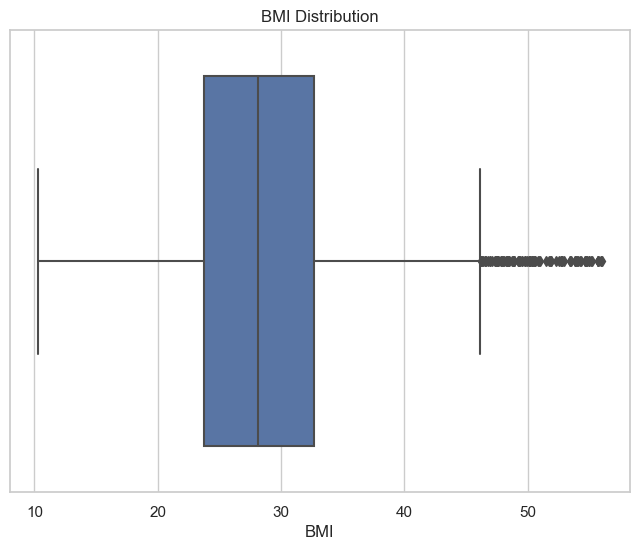

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_copy['bmi'])

plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.show()

- The `bmi` now is more distributed than before.

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5086 non-null   object 
 1   age                5086 non-null   int32  
 2   hypertension       5086 non-null   int64  
 3   heart_disease      5086 non-null   int64  
 4   ever_married       5086 non-null   object 
 5   work_type          5086 non-null   object 
 6   Residence_type     5086 non-null   object 
 7   avg_glucose_level  5086 non-null   float64
 8   bmi                5086 non-null   float64
 9   smoking_status     5086 non-null   object 
 10  stroke             5086 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 456.9+ KB


---

## Encode categorical data

In [18]:
df_copy.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5086,5086,5086,5086,5086
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2980,3332,2907,2587,1878


In [19]:
for column in df_copy.select_dtypes('O'):
    print(f"Unique values for '{column}': {df_copy[column].unique().tolist()}")

Unique values for 'gender': ['Male', 'Female', 'Other']
Unique values for 'ever_married': ['Yes', 'No']
Unique values for 'work_type': ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Unique values for 'Residence_type': ['Urban', 'Rural']
Unique values for 'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

for col in df_copy.select_dtypes('O'):
    df_copy[col] = label_encoder.fit_transform(df_copy[col])


In [21]:
df_copy.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.6,1,1
1,0,61,0,0,1,3,0,202.21,28.1,2,1
2,1,80,0,1,1,2,0,105.92,32.5,2,1
3,0,49,0,0,1,2,1,171.23,34.4,3,1
4,0,79,1,0,1,3,0,174.12,24.0,2,1
5,1,81,0,0,1,2,1,186.21,29.0,1,1


In [22]:
columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in columns:
    print(f"Unique values for '{column}': {df_copy[column].unique().tolist()}")


Unique values for 'gender': [1, 0, 2]
Unique values for 'ever_married': [1, 0]
Unique values for 'work_type': [2, 3, 0, 4, 1]
Unique values for 'Residence_type': [1, 0]
Unique values for 'smoking_status': [1, 2, 3, 0]


---

# Correlation (Heatmap)

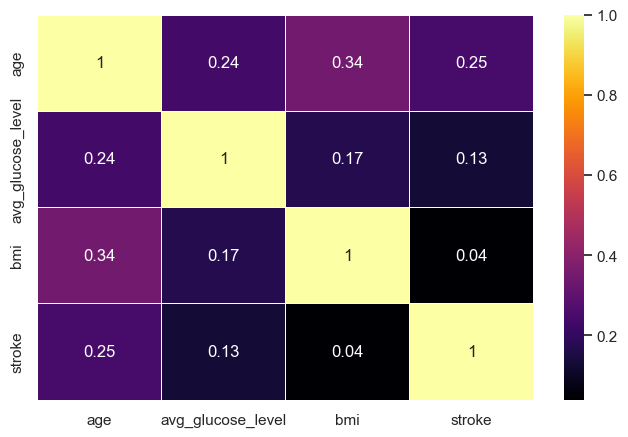

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df_copy[['age','avg_glucose_level','bmi','stroke']].corr(), annot=True,linewidths=.5, linecolor='white',cmap='inferno') 

plt.show()

---

## Check Balance of Target `stroke`

In [24]:
df_copy['stroke'].value_counts() 

0    4838
1     248
Name: stroke, dtype: int64

> We have **unbalance** that who don't have stroke is `4818` and who have is `243`, let's fix it.

In [25]:
from sklearn.utils import resample

In [26]:
df_copy_majority = df_copy[df_copy['stroke'] == 0]
df_copy_minority = df_copy[df_copy['stroke'] == 1]

In [27]:
df_copy_minority_oversampled = resample(df_copy_minority, 
                                   replace=True, 
                                   n_samples=int(len(df_copy_majority) * 0.6),  # the biggest target (which is 0)
                                   random_state=42)

df_copy_oversampled = pd.concat([df_copy_majority, df_copy_minority_oversampled])



In [28]:
df_copy_oversampled['stroke'].value_counts()

0    4838
1    2902
Name: stroke, dtype: int64

- The target `stroke` now is a little bit (Not fully) balanced 

In [29]:
df_copy_oversampled.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000,7740.000000
mean,0.420672,51.772481,0.156072,0.105943,0.729716,2.119897,0.525194,115.425758,29.149625,1.425452,0.374935
std,0.493960,22.998599,0.362947,0.307785,0.444135,1.033033,0.499397,52.907929,6.760552,1.044679,0.484138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,0.000000,2.000000,0.000000,78.180000,24.900000,0.000000,0.000000
50%,0.000000,57.000000,0.000000,0.000000,1.000000,2.000000,1.000000,95.275000,28.100000,2.000000,0.000000
75%,1.000000,72.000000,0.000000,0.000000,1.000000,3.000000,1.000000,131.410000,32.700000,2.000000,1.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,56.000000,3.000000,1.000000


---

## Start to split our data to prepare it to the modeling phase

In [30]:
X = df_copy_oversampled.drop('stroke',axis=1)
y = df_copy_oversampled['stroke']

> let's see the *distribution* of our data to decide if we want to **Scale**.

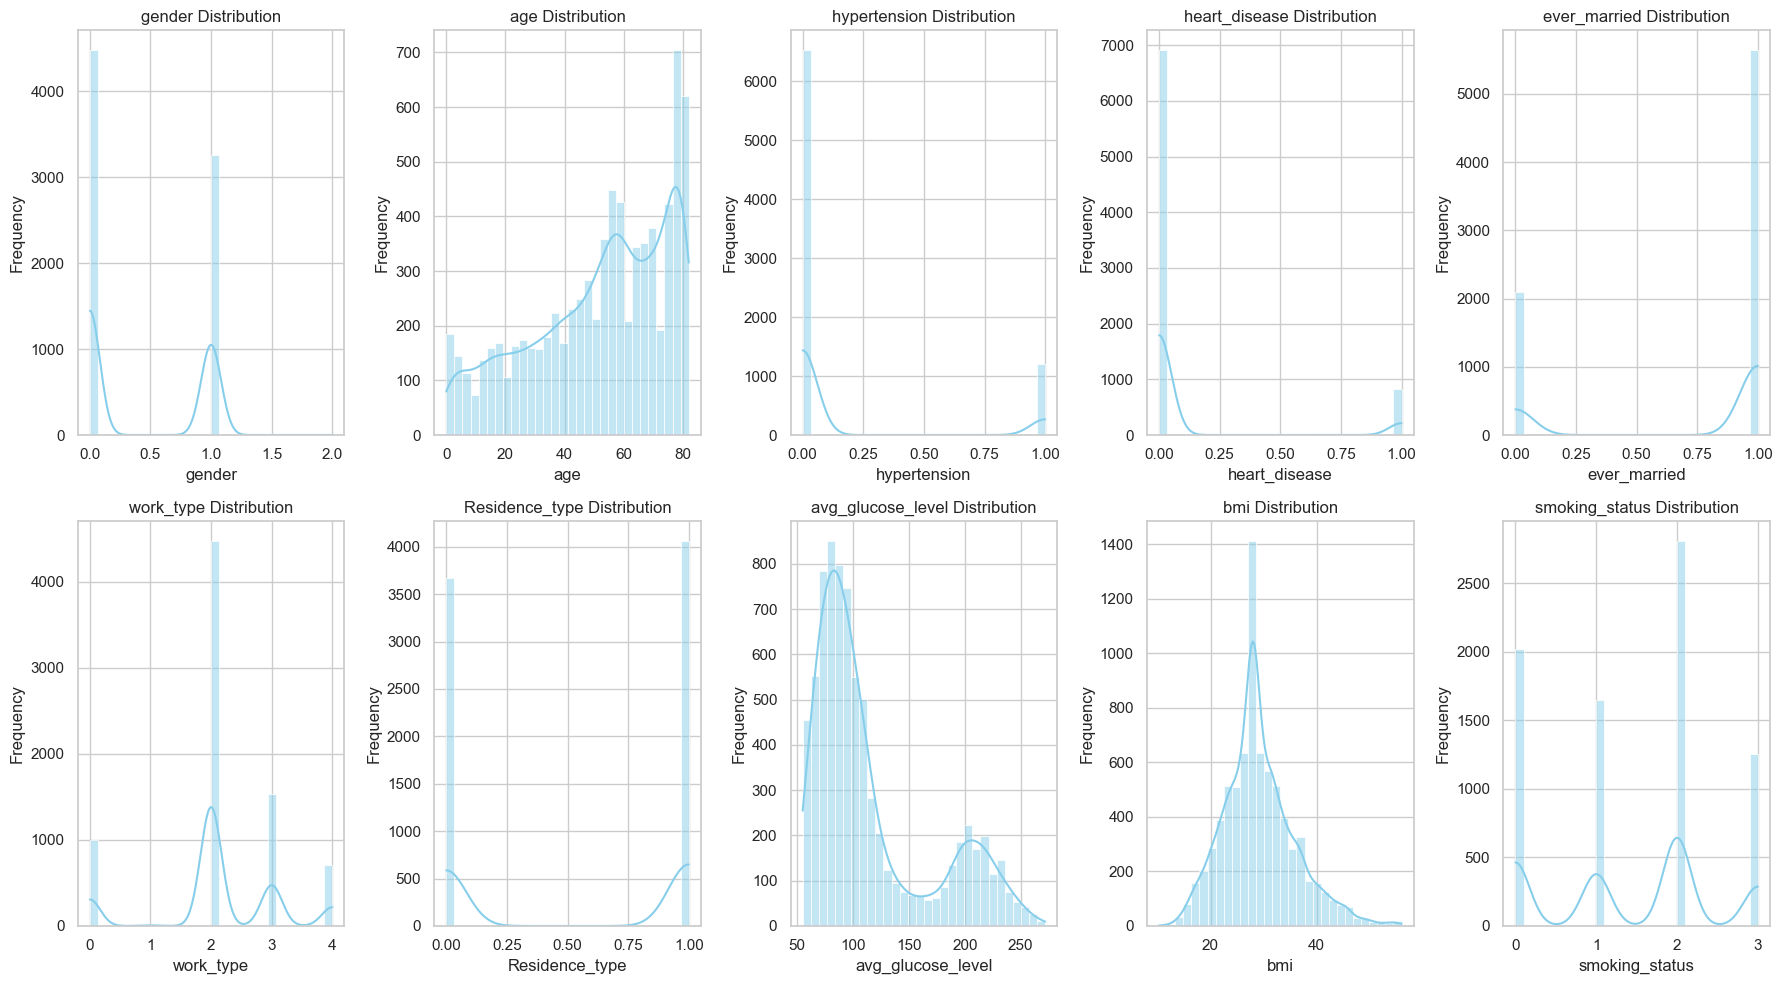

In [31]:
sns.set(style="whitegrid")

columns = X.select_dtypes(include='number').columns  

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

# Flatten axes array 
axes = axes.flatten()

# Plot each numerical column in the corresponding subplot
for i, col in enumerate(columns):
    sns.histplot(X[col], kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

We have 10 numerical columns in the dataset. These columns can be divided into two groups:

- **Group 1 (7 columns)**: The values in these columns range from 0 to 4.
- **Group 2 (3 columns)**: The values in these columns are much larger, reaching up to 250.

### Should We Scale the Data?

- **Scaling Considerations**: 
    - The large difference in values between Group 1 (ranging from 0 to 4) and Group 2 (ranging up to 250) suggests that the data may have a medium degree of variability.
    - If the data is used for machine learning models (especially distance-based algorithms like `k-NN`), scaling could be **necessary**. 
    - If we are using models that are **not sensitive** to the scale of the data (such as `decision trees` or `random forests`), scaling may **not be essential**.




---

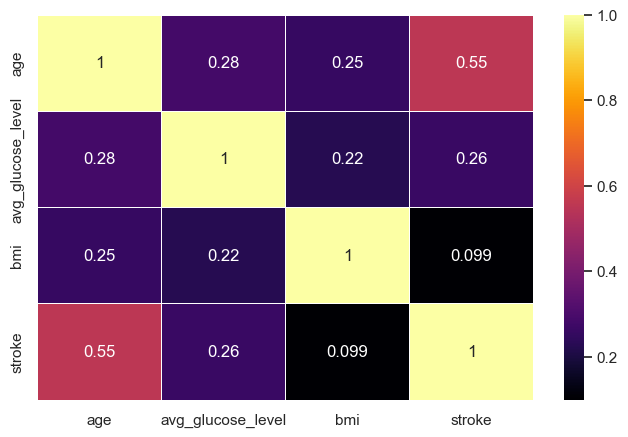

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(df_copy_oversampled[['age','avg_glucose_level','bmi','stroke']].corr(), annot=True,linewidths=.5, linecolor='white',cmap='inferno') 

plt.show()

# Build Model


### Logistic Regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1241)

In [34]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf = LogisticRegression(C=3, penalty ='l1',solver='liblinear' )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

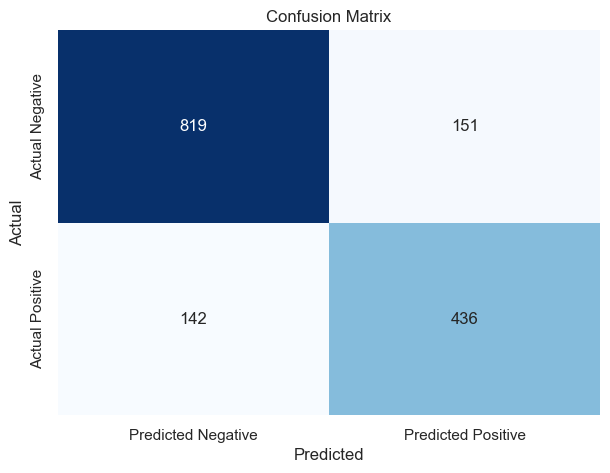

Accuracy Score: 81.07%


In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred)* 100,2) }%')

In [38]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       961
           1       0.75      0.74      0.75       587

    accuracy                           0.81      1548
   macro avg       0.80      0.80      0.80      1548
weighted avg       0.81      0.81      0.81      1548



-------------------------------------------------------------------
### Decision Tree

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1241)

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 2,max_depth=18)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=18, random_state=2)

In [41]:
y_pred = classifier.predict(X_test)

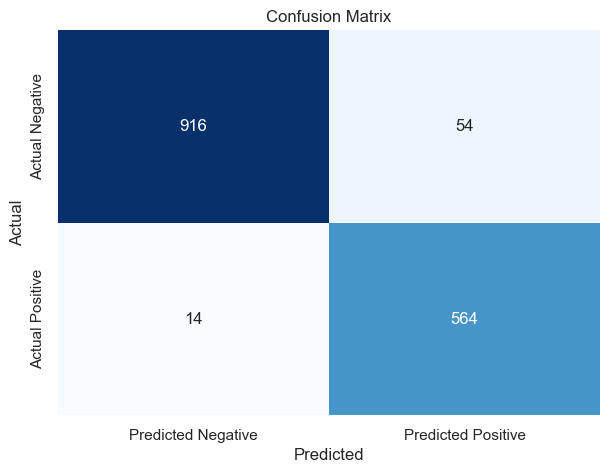

Accuracy Score: 95.61%


In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred)* 100,2) }%')

In [43]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       930
           1       0.98      0.91      0.94       618

    accuracy                           0.96      1548
   macro avg       0.96      0.95      0.95      1548
weighted avg       0.96      0.96      0.96      1548



-------------------------------------------------------------------
### Random Forest

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1241)

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 43, criterion = 'gini', random_state = 0,max_depth=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=43, random_state=0)

In [46]:
y_pred = classifier.predict(X_test)

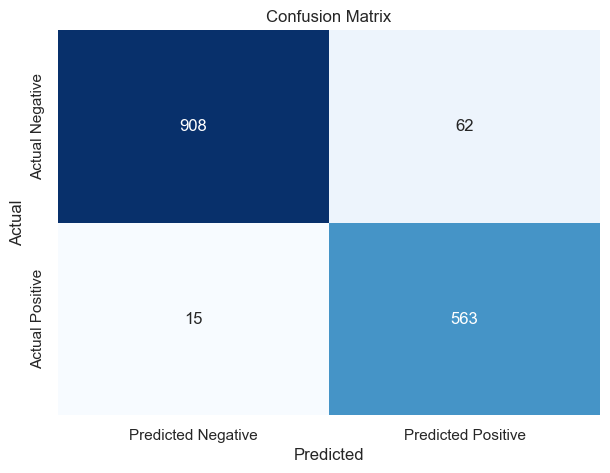

Accuracy Score: 95.03%


In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred)* 100,2) }%')

In [48]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       923
           1       0.97      0.90      0.94       625

    accuracy                           0.95      1548
   macro avg       0.96      0.94      0.95      1548
weighted avg       0.95      0.95      0.95      1548



---
### Support Vector Machine

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 83)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state =1,degree=5,C=6)
classifier.fit(X_train, y_train)

SVC(C=6, degree=5, kernel='poly', random_state=1)

In [52]:
y_pred = classifier.predict(X_test)

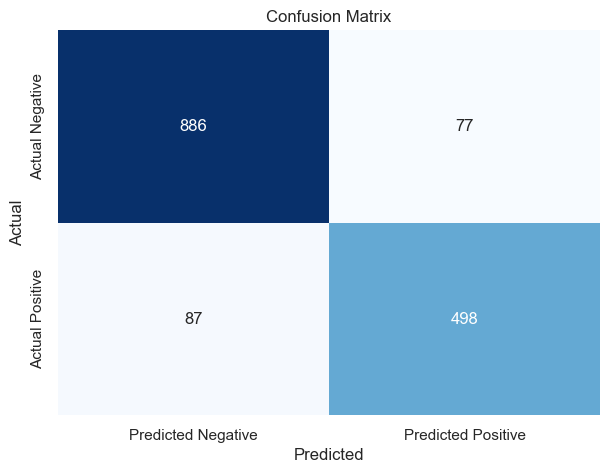

Accuracy Score: 89.41%


In [53]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred)* 100,2) }%')

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       973
           1       0.85      0.87      0.86       575

    accuracy                           0.89      1548
   macro avg       0.89      0.89      0.89      1548
weighted avg       0.89      0.89      0.89      1548



---

# 🌟 **Winner Model: Decision Tree Classifier** 🌟

The **Decision Tree Classifier** has been successfully get the highest accuracy with `95.61%` and is now ready to make predictions. Here's how to ensure the model works properly when making predictions with new, unseen data. 💡




In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1241)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 43, criterion = 'gini', random_state = 0,max_depth=10)
classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=43, random_state=0)

# Predicting unseen data

In [56]:
# [1, 67.0, 0, 1, 1, 2, 1, 228.69, 36.6, 1] -- > 1 
# [0, 57.0, 1, 0, 0, 2, 0, 116.93, 28.3, 2]  -- > 0 

unseen_data = pd.DataFrame({
    'gender': ['Female'],
    'age': [33],
    'hypertension': [0],
    'heart_disease': [0],
    'ever_married': ['Yes'],
    'work_type': ['Govt_job'],
    'Residence_type': ['Rural'],
    'avg_glucose_level': [57.92],
    'bmi': [22.3],
    'smoking_status': ['Unknown']
})


# Encode categorical variables
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoder = LabelEncoder()


for col in categorical_columns:
    unseen_data[col] = label_encoder.fit_transform(unseen_data[col])


prediction = classifier.predict(unseen_data)

print("Prediction for unseen data:", prediction)


Prediction for unseen data: [0]



# <span style="color:#F08080;">🎉✨ **Thank You!** ✨🎉</span>


---